# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

650

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#base url for API calls from openweathermap.org API
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&"
#create lists to store all of the values needed below (lat, lng, max temp, humidity, cloudiness, wind speed, country, and date)
city_name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
windspeed=[]
country=[]
date=[]

#create a loop for cities to start the api call and use city as the query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#example 06/2/03 & 06/02/07 openweatherrequest and openweathermap.org helps to create/see json response to feed into the lists above
#use try so if an error occurs it is easier to catch 
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        print(f'Processing Record | Count: {i} City Name: {city}')
        i +=1
    except(KeyError):
        print("City not found. Skipping...")
        
    

Processing Record | Count: 1 City Name: sokol
Processing Record | Count: 2 City Name: bluff
Processing Record | Count: 3 City Name: tomatlan
Processing Record | Count: 4 City Name: esperance
City not found. Skipping...
Processing Record | Count: 5 City Name: korla
Processing Record | Count: 6 City Name: ushuaia
Processing Record | Count: 7 City Name: vaini
Processing Record | Count: 8 City Name: arraial do cabo
Processing Record | Count: 9 City Name: smithers
Processing Record | Count: 10 City Name: usinsk
Processing Record | Count: 11 City Name: bredasdorp
Processing Record | Count: 12 City Name: rikitea
Processing Record | Count: 13 City Name: ahipara
City not found. Skipping...
Processing Record | Count: 14 City Name: jieshi
Processing Record | Count: 15 City Name: tasiilaq
Processing Record | Count: 16 City Name: mataura
Processing Record | Count: 17 City Name: zhigansk
Processing Record | Count: 18 City Name: muscat
Processing Record | Count: 19 City Name: dubbo
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#making a dataframe for the cities
df=pd.DataFrame({"City": city_name, "Lat": lat, "Lng": lng, "Max Temp" : max_temp, "Humidity" : humidity, 'Cloudiness' : cloudiness, "Wind Speed" :windspeed, "Country" : country, 'Date': date})

#export the dataframe to a CSV file
df.to_csv('city.csv')
df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sokol,59.4617,40.1206,25.11,92,91,15.05,RU,1648339856
1,Bluff,-46.6000,168.3333,58.62,73,59,2.06,NZ,1648339693
2,Tomatlán,19.9333,-105.2500,82.02,33,8,7.05,MX,1648339857
3,Esperance,-33.8667,121.9000,66.04,85,100,13.91,AU,1648339815
4,Korla,41.7597,86.1469,43.41,53,79,3.06,CN,1648339750
5,Ushuaia,-54.8000,-68.3000,46.06,93,75,4.61,AR,1648339707
6,Vaini,-21.2000,-175.2000,78.58,67,64,9.69,TO,1648339687
7,Arraial do Cabo,-22.9661,-42.0278,77.13,90,10,11.36,BR,1648339744
8,Smithers,54.7804,-127.1743,39.52,81,100,4.61,CA,1648339735
9,Usinsk,65.9939,57.5281,7.65,90,100,18.99,RU,1648339858


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
limit = 100
column_name = 'Humidity'
# Get count of values greater than 40 in the column 'B' 
count = (df['Humidity'] > limit).sum()
print('Count of values greater than 100 in Humidity : ', count)

Count of values greater than 100 in Humidity :  0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

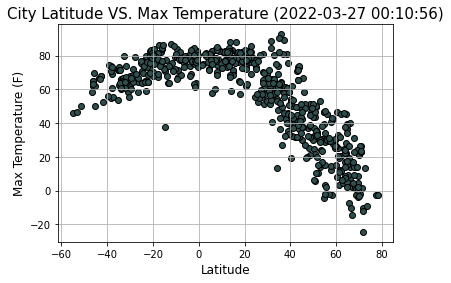

In [9]:
#Convert Date for the title import datetime to get access to the date timestamp, and shorten it 
from datetime import datetime
date = df["Date"][0]
datetime = datetime.utcfromtimestamp(date)

#Creating the scatter plot for the lat vs max temp
plt.scatter(df["Lat"], df["Max Temp"], marker = "o", color = "darkslategrey", edgecolor='black')
plt.grid()
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.title(f"City Latitude VS. Max Temperature ({datetime})", fontsize=15)
plt.savefig("Lat_vs_Temp_Plot")
plt.show()

Looking at the Latitude vs. Temperature as the latitude is increased the temperature falls before and after 0 degrees. This is to be expected since 0 degrees is the equator where the temperature is expected to be the highest. 

## Latitude vs. Humidity Plot

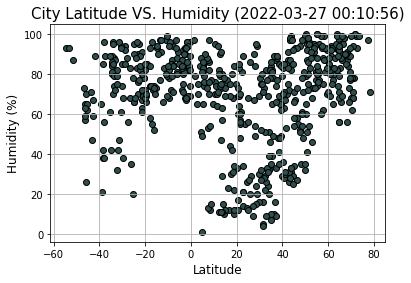

In [10]:
#Creating the scatter plot for the lat vs humidity
plt.scatter(df["Lat"], df["Humidity"], marker = "o", color = "darkslategrey", edgecolor='black')
plt.grid()
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.title(f"City Latitude VS. Humidity ({datetime})", fontsize=15)
plt.savefig("Lat_vs_Humidity")
plt.show()

Humidity will vary across the world as there seems to be no relationship between the humdity percentage to the latitude. There are 100% measurements between -40 and 75.

## Latitude vs. Cloudiness Plot

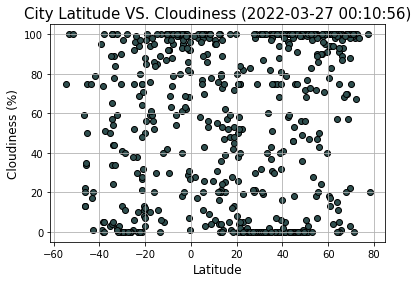

In [11]:
#Creating the scatter plot for the lat vs cloudiness
plt.scatter(df["Lat"], df["Cloudiness"], marker = "o", color = "darkslategrey", edgecolor='black')
plt.grid()
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.title(f"City Latitude VS. Cloudiness ({datetime})", fontsize=15)
plt.savefig("Lat_vs_Cloudiness")
plt.show()

The latitude also has no correlation between the percentage of cloudiness. As you can see there is 0 and 100% across the entire latitudes.

## Latitude vs. Wind Speed Plot

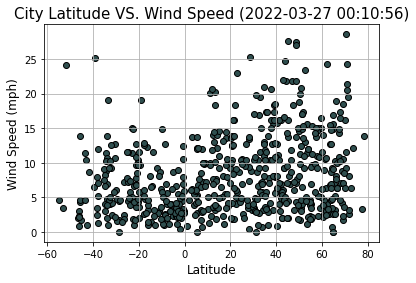

In [12]:
#Creating the scatter plot for the lat vs windspeed
plt.scatter(df["Lat"], df["Wind Speed"], marker = "o", color = "darkslategrey", edgecolor='black')
plt.grid()
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.title(f"City Latitude VS. Wind Speed ({datetime})", fontsize=15)
plt.savefig("Lat_vs_Wind_Speed")
plt.show()

Wind speed varies across the latitude and there are some peaks of wind speed around 40 degrees.

## Linear Regression

In [13]:
#create northern and southern hemisphere 
north_hemisphere = df.loc[df["Lat"]>=0]
south_hemisphere = df.loc[df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
#create a base function for all of the plots to create a linear regression and plot the r values and print the r value
def linear_regression_plot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.mean(), y_values.mean()),fontsize=20,color="b", fontweight='bold')
    plt.xlabel('Laititude', fontsize = 12)
    print(f"The r-value is : {rvalue}")
    plt.show()
    

The r-value is : -0.8733154620738042


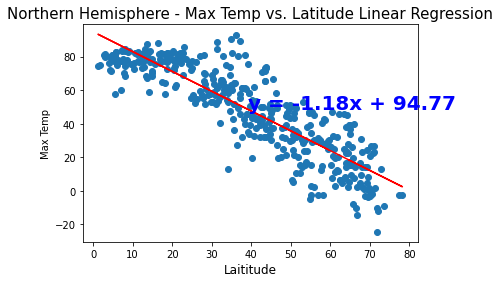

None


In [15]:
x_values=north_hemisphere["Lat"]
y_values=north_hemisphere["Max Temp"]
plt.ylabel("Max Temp")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression", fontsize=15)
print(linear_regression_plot(x_values, y_values))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.6252181007827893


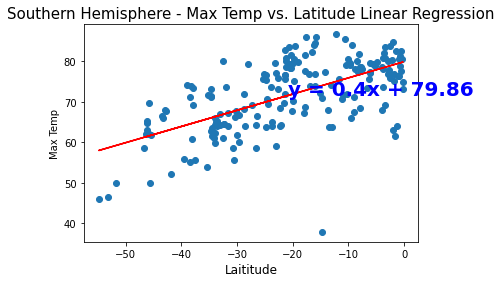

None


In [16]:
x_values=south_hemisphere["Lat"]
y_values=south_hemisphere["Max Temp"]
plt.ylabel("Max Temp")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression", fontsize=15)
print(linear_regression_plot(x_values, y_values))



There is a negative correlation between latitude and max temperature for the nothern hemisphere, and there is a smaller positive correlation between the max temperature and latitude for the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.3732825279656446


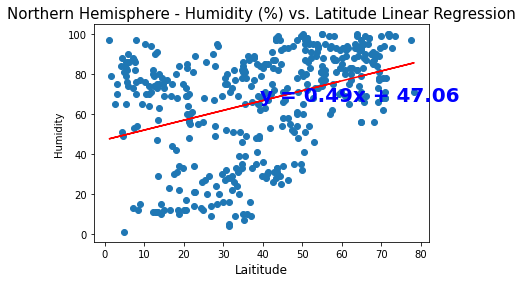

None


In [17]:
x_values=north_hemisphere["Lat"]
y_values=north_hemisphere["Humidity"]
plt.ylabel("Humidity")
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression", fontsize=15)
print(linear_regression_plot(x_values, y_values))


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.3401085675925087


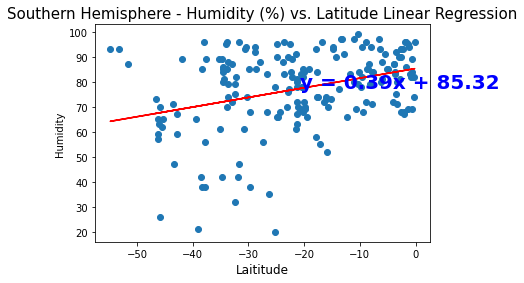

None


In [18]:
x_values=south_hemisphere["Lat"]
y_values=south_hemisphere["Humidity"]
plt.ylabel("Humidity")
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression", fontsize=15)
print(linear_regression_plot(x_values, y_values))


For both of the northern and southern hemispheres there is a very small postivie correlation between the humidity and the latitudes. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.2613944500243426


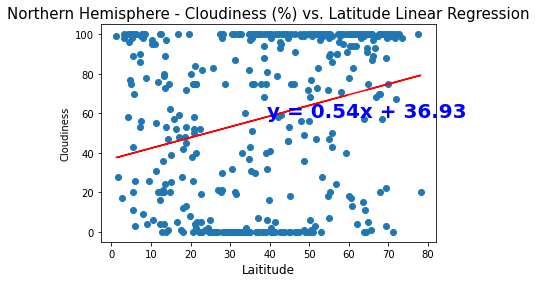

None


In [19]:
x_values=north_hemisphere["Lat"]
y_values=north_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", fontsize=15)
print(linear_regression_plot(x_values, y_values))


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.328101231076371


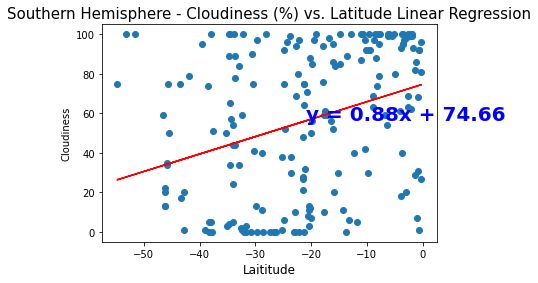

None


In [20]:
x_values=south_hemisphere["Lat"]
y_values=south_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression", fontsize=15)
print(linear_regression_plot(x_values, y_values))


The southern hemisphere has a positive correlation between the latitude and clouds but since the r value is so low it is a very low positive corrlation. The northern hemisphere has a similar low positive correlation as well. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.11987961416485343


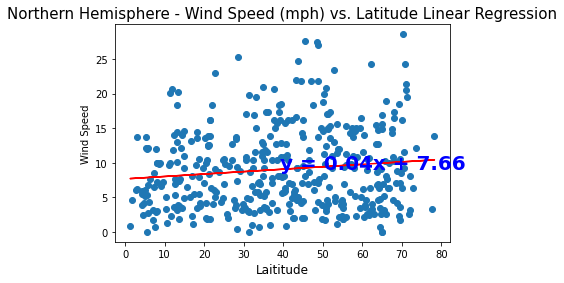

None


In [21]:
x_values=north_hemisphere["Lat"]
y_values=north_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression", fontsize=15)
print(linear_regression_plot(x_values, y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.2126389945226794


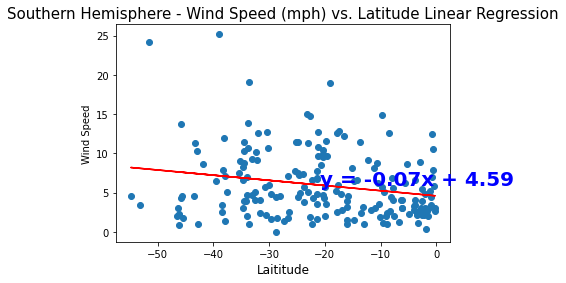

None


In [22]:
x_values=south_hemisphere["Lat"]
y_values=south_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression", fontsize=15)
print(linear_regression_plot(x_values, y_values))

There are weak correlations between the hemispheres and the wind speeds.